In [21]:
import pandas as pd
data = pd.read_csv('winequality-red.csv',sep=';')

In [22]:
import numpy as np
data = np.array(data)
#随机打乱
np.random.seed(0)
np.random.shuffle(data)

In [23]:
#最后一列是标签，前面的是特征
X = data[:,:-1]
y = data[:,-1]

In [24]:
#根据最后一列的值，将数据分为两类，0-5为一类，7-10为一类
y = np.array([1 if i>5 else 0 for i in y])

In [25]:
#显示数据的前5行
print(X[:5])
print(y[:5])

[[1.0800e+01 4.7000e-01 4.3000e-01 2.1000e+00 1.7100e-01 2.7000e+01
  6.6000e+01 9.9820e-01 3.1700e+00 7.6000e-01 1.0800e+01]
 [8.1000e+00 8.2000e-01 0.0000e+00 4.1000e+00 9.5000e-02 5.0000e+00
  1.4000e+01 9.9854e-01 3.3600e+00 5.3000e-01 9.6000e+00]
 [9.1000e+00 2.9000e-01 3.3000e-01 2.0500e+00 6.3000e-02 1.3000e+01
  2.7000e+01 9.9516e-01 3.2600e+00 8.4000e-01 1.1700e+01]
 [1.0200e+01 6.4500e-01 3.6000e-01 1.8000e+00 5.3000e-02 5.0000e+00
  1.4000e+01 9.9820e-01 3.1700e+00 4.2000e-01 1.0000e+01]
 [1.2200e+01 4.5000e-01 4.9000e-01 1.4000e+00 7.5000e-02 3.0000e+00
  6.0000e+00 9.9690e-01 3.1300e+00 6.3000e-01 1.0400e+01]]
[1 0 1 1 0]


In [26]:
#定义PCA函数，把数据降到2维
#去中心化
X -= np.mean(X,axis=0)
#计算协方差矩阵
cov = np.cov(X,rowvar=False)
#计算特征值和特征向量
eig_vals,eig_vecs = np.linalg.eig(cov)
#对特征值进行排序
eig_vals_index = np.argsort(eig_vals)[::-1]
#取前两个特征向量
eig_vecs = eig_vecs[:,eig_vals_index[:2]]
#计算降维后的数据
X_pca = np.dot(X,eig_vecs)
#把特征标准化
X_pca /= np.std(X_pca,axis=0)

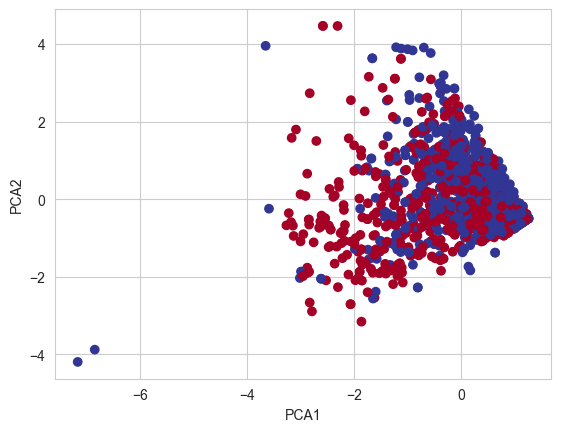

In [27]:
#用二维数据画出散点图，颜色为红色和蓝色
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap=plt.cm.RdYlBu)
#标题设置为PCA1和PCA2
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


SVM,支持向量机，是一种二分类模型，它的基本模型是定义在特征空间上的间隔最大的线性分类器，间隔最大使它有别于感知机；支持向量机还包括核技巧，这使它成为实质上的非线性分类器。
SVM的目标在于最大化间隔，即最大化支持向量到超平面的距离，这样可以使得模型更加鲁棒，因为支持向量的位置是由数据决定的，而不是由参数决定的，考虑到软间隔的情况下公式如下：
$$
\begin{equation}
\begin{aligned}
&\min_{w,b,\xi} \frac{1}{2}||w||^2+C\sum_{i=1}^m\xi_i\\
&s.t. \quad y_i(w^Tx_i+b)\geq 1-\xi_i\\
&\xi_i\geq 0,i=1,2,...,m
\end{aligned}
\end{equation}
$$
其中$\xi_i$是松弛变量，它允许样本出现在分隔面错误的一侧，C是惩罚系数，它的值越大，对误分类的惩罚越大。


上面问题的拉格朗日函数为：
$$
\begin{equation}
\begin{aligned}
L(w,b,\xi,\alpha,\mu)=&\frac{1}{2}||w||^2+C\sum_{i=1}^m\xi_i-\sum_{i=1}^m\alpha_i[y_i(w^Tx_i+b)-1+\xi_i]-\sum_{i=1}^m\mu_i\xi_i\\
=&\frac{1}{2}||w||^2+C\sum_{i=1}^m\xi_i-\sum_{i=1}^m\alpha_iy_i(w^Tx_i+b)+\sum_{i=1}^m\alpha_i-\sum_{i=1}^m\alpha_i\xi_i-\sum_{i=1}^m\mu_i\xi_i\\
=&\frac{1}{2}||w||^2+C\sum_{i=1}^m\xi_i-\sum_{i=1}^m\alpha_iy_i(w^Tx_i+b)+\sum_{i=1}^m\alpha_i-\sum_{i=1}^m(\alpha_i+\mu_i)\xi_i
\end{aligned}
\end{equation}
$$


对应的KKT条件为：
$$
\begin{equation}
\begin{aligned}
&\frac{\partial L}{\partial w}=w-\sum_{i=1}^m\alpha_iy_ix_i=0\\
&\frac{\partial L}{\partial b}=-\sum_{i=1}^m\alpha_iy_i=0\\
&\frac{\partial L}{\partial \xi_i}=C-\alpha_i-\mu_i=0\\
&\alpha_i[y_i(w^Tx_i+b)-1+\xi_i]=0\\
&\mu_i\xi_i=0\\
&y_i(w^Tx_i+b)-1+\xi_i\geq 0\\
&\alpha_i\geq 0\\
&\mu_i\geq 0
\end{aligned}
\end{equation}
$$


将上面的KKT条件代入拉格朗日函数，得到对偶问题：
$$
\begin{equation}
\begin{aligned}
\max_{\alpha}\quad &\sum_{i=1}^m\alpha_i-\frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jx_i^Tx_j\\
s.t.\quad &\sum_{i=1}^m\alpha_iy_i=0\\
&0\leq\alpha_i\leq C,i=1,2,...,m
\end{aligned}
\end{equation}
$$
由此可见，SVM的求解只需要计算在决策边界上的支持向量，而其他的样本都不需要计算，这样就大大减少了计算量。


同时通过讨论$\alpha$的取值，我们可以决定哪些样本是支持向量：
1. 当$\alpha_i=0$时，$y_i(w^Tx_i+b)=1$，此时样本在分隔面正确的一侧，不需要计算；
2. 当$0<\alpha_i<C$时，$y_i(w^Tx_i+b)=1$，此时样本在分隔面上，需要计算；
3. 当$\alpha_i=C$时，$y_i(w^Tx_i+b)=1$，此时样本在分隔面错误的一侧，需要计算。


不过求解上面的对偶问题也是一个凸二次规划问题，可以通过SMO算法来求解，步骤如下：
1. 选择两个变量$\alpha_i$和$\alpha_j$，固定其他变量，求解对偶问题，得到最优解$\alpha_i^*$和$\alpha_j^*$；
2. 计算$E_i$和$E_j$；
3. 选择变量$\alpha_i$和$\alpha_j$，使得$|E_i-E_j|$最大；
4. 选择变量$\alpha_i$和$\alpha_j$，固定其他变量，求解对偶问题，得到最优解$\alpha_i^*$和$\alpha_j^*$；

一旦求得$\alpha$，就可以求得$w$和$b$：
$$
\begin{equation}
\begin{aligned}
w=&\sum_{i=1}^m\alpha_iy_ix_i\\
b=&y_i-\sum_{i=1}^m\alpha_iy_ix_i^Tx_j
\end{aligned}
\end{equation}
$$


同时通过讨论C的取值，可以得到以下结论：
1. 当C趋近于无穷大时，相当于没有松弛变量，此时模型相当于一个硬间隔模型，此时模型对噪声非常敏感，容易过拟合；
2. 当C趋近于0时，相当于允许所有的样本都可以在分隔面的错误一侧，此时模型相当于一个软间隔模型，此时模型对噪声不敏感，容易欠拟合；
3. C的取值需要根据具体的问题来确定，一般来说，C的取值越大，模型的泛化能力越差，但是对训练集的拟合能力越强，反之亦然。

In [28]:
import random as rnd
class SVM():
    """
        Simple implementation of a Support Vector Machine using the
        Sequential Minimal Optimization (SMO) algorithm for training.
    """
    def __init__(self, max_iter=10000, kernel_type='linear', C=1.0, epsilon=0.0001):
        self.kernels = {
            'linear' : self.kernel_linear,
            'quadratic' : self.kernel_quadratic,
            'gaussian' : self.kernel_gaussian
        }
        self.max_iter = max_iter
        self.kernel_type = kernel_type
        self.C = C
        self.epsilon = epsilon
    def fit(self, X, y):
        # Initialization
        n, d = X.shape[0], X.shape[1]
        alpha = np.zeros((n))
        kernel = self.kernels[self.kernel_type]
        count = 0
        while True:
            count += 1
            alpha_prev = np.copy(alpha)
            for j in range(0, n):
                i = self.get_rnd_int(0, n-1, j) # Get random int i~=j
                x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
                k_ij = kernel(x_i, x_i) + kernel(x_j, x_j) - 2 * kernel(x_i, x_j)
                if k_ij == 0:
                    continue
                alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
                (L, H) = self.compute_L_H(self.C, alpha_prime_j, alpha_prime_i, y_j, y_i)

                # Compute model parameters
                self.w = self.calc_w(alpha, y, X)
                self.b = self.calc_b(X, y, self.w)

                # Compute E_i, E_j
                E_i = self.E(x_i, y_i, self.w, self.b)
                E_j = self.E(x_j, y_j, self.w, self.b)

                # Set new alpha values
                alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
                alpha[j] = max(alpha[j], L)
                alpha[j] = min(alpha[j], H)

                alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])

            # Check convergence
            diff = np.linalg.norm(alpha - alpha_prev)
            if diff < self.epsilon:
                break

            if count >= self.max_iter:
                print("Iteration number exceeded the max of %d iterations" % (self.max_iter))
                return
        
        # Compute final model parameters
        self.b = self.calc_b(X, y, self.w)
        if self.kernel_type == 'linear':
            self.w = self.calc_w(alpha, y, X)
        # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        return support_vectors, count,alpha_idx
    
    def predict(self, X):
        return self.h(X, self.w, self.b)
    def calc_b(self, X, y, w):
        b_tmp = y - np.dot(w.T, X.T)
        return np.mean(b_tmp)
    def calc_w(self, alpha, y, X):
        return np.dot(X.T, np.multiply(alpha,y))
    # Prediction
    def h(self, X, w, b):
        return np.sign(np.dot(w.T, X.T) + b).astype(int)
    # Prediction error
    def E(self, x_k, y_k, w, b):
        return self.h(x_k, w, b) - y_k
    def compute_L_H(self, C, alpha_prime_j, alpha_prime_i, y_j, y_i):
        if(y_i != y_j):
            return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
        else:
            return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    def get_rnd_int(self, a,b,z):
        i = z
        cnt=0
        while i == z and cnt<1000:
            i = rnd.randint(a,b)
            cnt=cnt+1
        return i
    
    # Define kernels
    def kernel_linear(self, x1, x2):
        return np.dot(x1, x2.T)
    #Quadratic kernel
    def kernel_quadratic(self, x1, x2):
        return (np.dot(x1, x2.T) ** 5)
    #Gaussian kernel
    def kernel_gaussian(self, x1, x2, sigma=0.5):
        return np.exp(-np.linalg.norm(x1-x2)**2 / (2 * (sigma ** 2)))
    #Quadratic mapping
    def kernel_quadratic_mapping(self, X):
        n, d = X.shape[0], X.shape[1]
        X_map = np.zeros((n, int(d*(d+1)/2)))
        for i in range(n):
            cnt = 0
            for j in range(d):
                X_map[i][cnt] = X[i][j] ** 2
                cnt += 1
            for j in range(d):
                for k in range(j+1, d):
                    X_map[i][cnt] = np.sqrt(2) * X[i][j] * X[i][k]
                    cnt += 1
        return X_map
    #Gaussian mapping
    def kernel_gaussian_mapping(self, X, sigma=0.5):
        n, d = X.shape[0], X.shape[1]
        X_map = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                X_map[i][j] = self.kernel_gaussian(X[i], X[j], sigma)
        return X_map
    #Kernel mapping
    def mapping(self, X):
        if self.kernel_type == 'quadratic':
            return self.kernel_quadratic_mapping(X)
        elif self.kernel_type == 'gaussian':
            return self.kernel_gaussian_mapping(X)
        else:
            return X
    #print support vector indices
    def print_support_vector_idx(self, alpha_idx):
        print("Support vector indices:", alpha_idx)
        
    #Count number of support vectors
    def count_support_vectors(self, alpha_idx):
        return len(alpha_idx)
        
    #Draw results in 3D
    def plot_decision_boundary_3d(self, X,y):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu)
        
        plt.show()
    
    #Draw decision boundary in 2D
    def plot_decision_boundary(self, X, y):
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole grid
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
        plt.show()
    

0.45


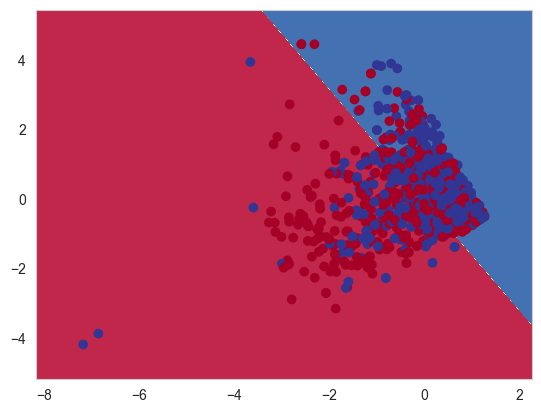

680


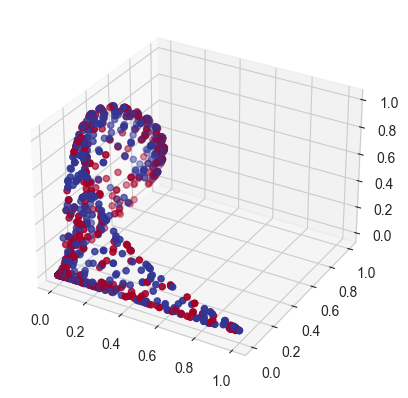

In [29]:
X_train = X_pca[:int(len(X)*0.8)]
y_train = y[:int(len(y)*0.8)]
X_test = X_pca[int(len(X)*0.8):]
y_test = y[int(len(y)*0.8):]
model = SVM(max_iter=10000, kernel_type='gaussian', C=1.0, epsilon=0.001)
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
# print(y_hat)

#计算准确率
print(np.mean(y_hat==y_test))

#绘制决策边界
model.plot_decision_boundary(X_train,y_train)

#统计支持向量的个数
print(model.count_support_vectors(model.fit(X_train,y_train)[2]))
#映射到高维空间
X_map = model.mapping(X_train)
#绘制决策边界
model.plot_decision_boundary_3d(X_map,y_train)


0.65


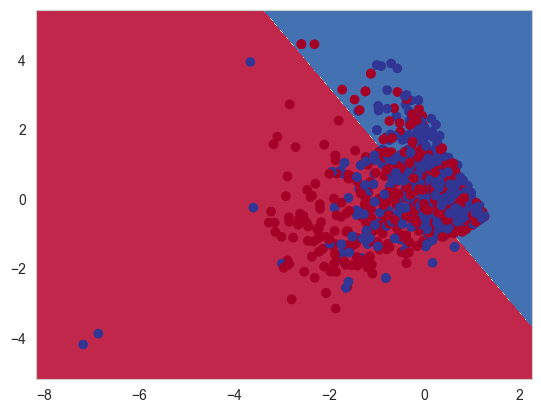

In [30]:
#采用sklearn中的SVM实现三种核的二分类并绘制决策边界，绘制样本高维映射后的决策边界
from sklearn.svm import SVC
#线性核
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)
print(np.mean(y_hat==y_test))
clf.support_vectors_
clf.n_support_
clf.coef_
clf.intercept_
#绘制决策边界
#用sklearn中的模型绘制决策边界



0.6


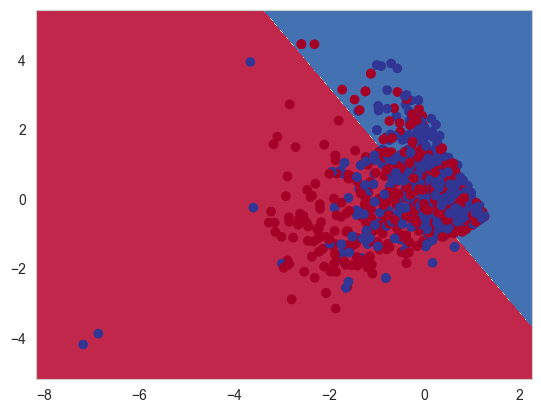

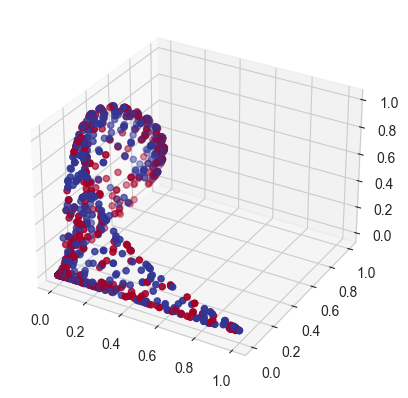

In [35]:
#多项式核
clf = SVC(kernel='poly',degree=2)
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)
print(np.mean(y_hat==y_test))
clf.support_vectors_
clf.n_support_
# clf.coef_
clf.intercept_
#绘制决策边界
model.plot_decision_boundary(X_train,y_train)
#在高维空间中绘制决策边界
X_map = model.mapping(X_train)
model.plot_decision_boundary_3d(X_map,y_train)


0.6375


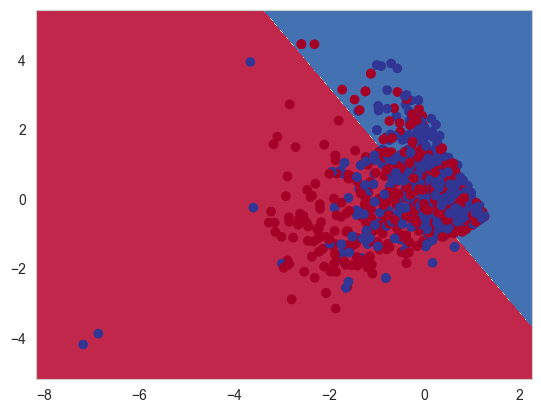

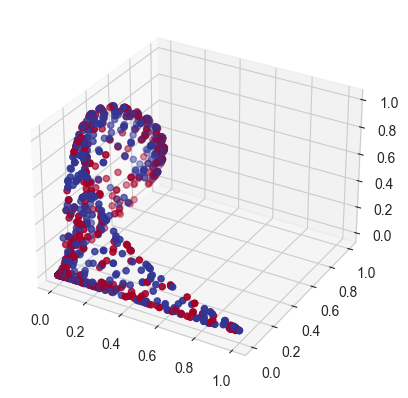

In [33]:
#高斯核
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_hat = clf.predict(X_test)
print(np.mean(y_hat==y_test))
clf.support_vectors_
clf.n_support_
# clf.coef_
clf.intercept_
#绘制决策边界
model.plot_decision_boundary(X_train,y_train)
#在高维空间中绘制决策边界
X_map = model.mapping(X_train)
model.plot_decision_boundary_3d(X_map,y_train)
